In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
# Read the city data file and store it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a pandas DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# Looking for null values
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Looking for null values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Checking driver_count column's datatype
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Figuring out how many data points we have for each type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Number of data points from the Urban cities
sum(city_data_df["type"] == "Urban")

66

In [11]:
# Number of data points from the Suburban cities
sum(city_data_df["type"] == "Suburban")

36

In [12]:
# Number of data points from the rural cities
sum(city_data_df["type"] == "Rural")

18

In [13]:
# Getting all the columns and rows that are not null in the ride data df
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
# Getting all the columns and rows that are not null in the ride data df
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
# Getting the data types for each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [16]:
# Combining the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on = ["city", "city"])

# Displaying the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# Creating the Urban city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
# Creating the Suburban city DataFrame
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [19]:
# Creating the Rural city DataFrame
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [20]:
# Getting the number of rides for Urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [21]:
# Getting the number of rides for Suburban cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

# Getting the number of rides for Rural cities
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [22]:
# Getting the average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [23]:
# Getting the average for each city in the suburban cities
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

# Getting the average for each city in the rural cities
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [24]:
# Getting the average number of drivers for each city in the urban cities
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [25]:
# Getting the average number of drivers for each city in the suburban cities
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

# Getting the average number of drivers for each city in the rural cities
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

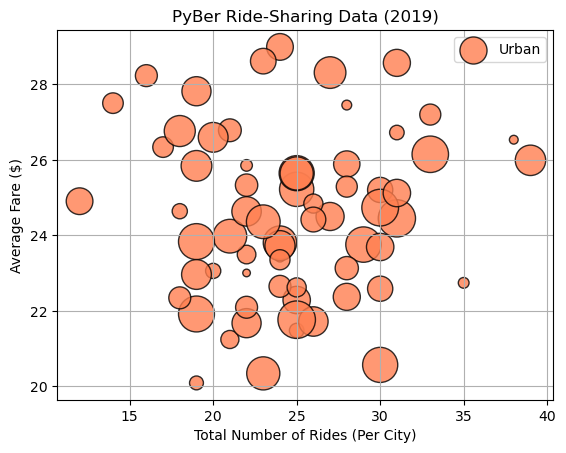

In [26]:
# Build the scatter plot for urban cities
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s = 10* urban_driver_count,
            c = "coral",
            alpha = 0.8,
            edgecolor = "black",
            lw = 1,
            label = "Urban")

plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid()
plt.legend()

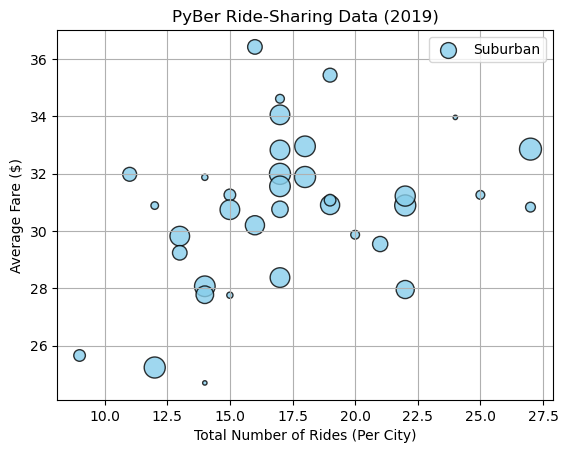

In [27]:
# Build the scatter plot for suburban cities
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s = 10* suburban_driver_count,
            c = "skyblue",
            alpha = 0.8,
            edgecolor = "black",
            lw = 1,
            label = "Suburban")

plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid()
plt.legend()

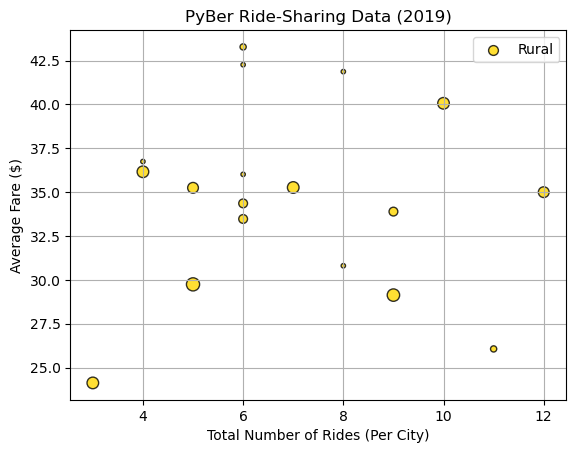

In [28]:
# Build the scatter plot for rural cities
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s = 10* rural_driver_count,
            c = "gold",
            alpha = 0.8,
            edgecolor = "black",
            lw = 1,
            label = "Rural")

plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid()
plt.legend()

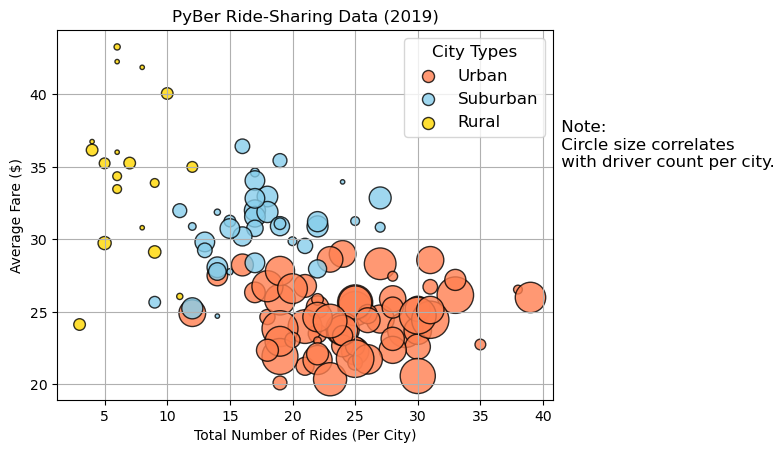

In [29]:
# Building the scatter plot for all the cities

# Urban cities
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s = 10* urban_driver_count,
            c = "coral",
            alpha = 0.8,
            edgecolor = "black",
            lw = 1,
            label = "Urban")


# Suburban cities
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s = 10* suburban_driver_count,
            c = "skyblue",
            alpha = 0.8,
            edgecolor = "black",
            lw = 1,
            label = "Suburban")


# Rural cities
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s = 10* rural_driver_count,
            c = "gold",
            alpha = 0.8,
            edgecolor = "black",
            lw = 1,
            label = "Rural")

# Descriptive graph attributes
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid()

# Creating the legend
lgnd = plt.legend(fontsize = "12", mode = "Expanded",
                  scatterpoints = 1, loc = "best", title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporating a text label about the meaning of the individual circles' sizes
plt.text(41, 35, " Note:\n Circle size correlates\n with driver count per city.", fontsize = 12)

# Saving the figure
plt.savefig("analysis/Fig1.png")

# Showing the graph
plt.show()

In [30]:
# Getting the summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [31]:
# Skill Drill 5.4.1
display(suburban_cities_df.describe())
display(rural_cities_df.describe())

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [32]:
# Getting summary statistics for the different city types
display("Urban:", urban_ride_count.describe())
display("Suburban:", suburban_ride_count.describe())
display("Rural:", rural_ride_count.describe())

'Urban:'

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

'Suburban:'

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

'Rural:'

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [33]:
# Getting the mean of the ride count for each city type
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [34]:
# Getting the median of the ride count for each city type
round(urban_ride_count.median(), 2), round(suburban_ride_count.median(), 2), round(rural_ride_count.median(), 2)

(24.0, 17.0, 6.0)

In [35]:
# Getting the mode of the ride count for the urban cities
display("Urban:", urban_ride_count.mode())
display("Suburban:", suburban_ride_count.mode())
display("Rural:", rural_ride_count.mode())

'Urban:'

0    22
1    25
dtype: int64

'Suburban:'

0    17
dtype: int64

'Rural:'

0    6
dtype: int64

In [36]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [37]:
# Calculate the measures of central tendency for the ride count for the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}")

The mean for the ride counts for urban trips is 24.62
The median for the ride counts for urban trips is 24.0
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7]))


In [38]:
# Finding mode of suburban cities
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for the suburban trips is {mode_suburban_ride_count}")

The mode for the ride counts for the suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7]))


In [39]:
# Finding mode of rural cities
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for the rural trips is {mode_rural_ride_count}")

The mode for the ride counts for the rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5]))


In [40]:
# Getting the fares for the urban cities
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [41]:
# Finding the measures of central tendency for the average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}\n")



# Finding the measures of central tendency for the average fare for the suburban cities
suburban_fares = suburban_cities_df["fare"]

mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}\n")



# Finding the measures of central tendency for the average fare for the rural cities
rural_fares = rural_cities_df["fare"]

mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}")

The mean fare price for urban trips is $24.53
The median fare price for urban trips is $24.64
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5]))

The mean fare price for suburban trips is $30.97
The median fare price for suburban trips is $30.75
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3]))

The mean fare price for rural trips is $34.62
The median fare price for rural trips is $37.05
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2]))


In [42]:
# Skill Drill 5.4.3
# Getting the driver count data from the different city types
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

# Finding the mean, median, and mode for the urban cities
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean of the number of drivers in urban cities is {mean_urban_drivers:.2f}")

median_urban_drivers = np.median(urban_drivers)
print(f"The median of the number of drivers in urban cities is {median_urban_drivers}")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode of the number of drivers in urban cities is {mode_urban_drivers}\n")


# Finding the mean, median, and mode for the suburban cities
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean of the number of drivers in suburban cities is {mean_suburban_drivers:.2f}")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median of the number of drivers in suburban cities is {median_suburban_drivers}")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode of the number of drivers in suburban cities is {mode_suburban_drivers}\n")


# Finding the mean, median, and mode for the rural cities
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean of the number of drivers in rural cities is {mean_rural_drivers:.2f}")

median_rural_drivers = np.median(rural_drivers)
print(f"The median of the number of drivers in rural cities is {median_rural_drivers}")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode of the number of drivers in rural cities is {mode_rural_drivers}")

The mean of the number of drivers in urban cities is 36.68
The median of the number of drivers in urban cities is 37.0
The mode of the number of drivers in urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86]))

The mean of the number of drivers in suburban cities is 13.71
The median of the number of drivers in suburban cities is 16.0
The mode of the number of drivers in suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79]))

The mean of the number of drivers in rural cities is 4.30
The median of the number of drivers in rural cities is 4.0
The mode of the number of drivers in rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32]))


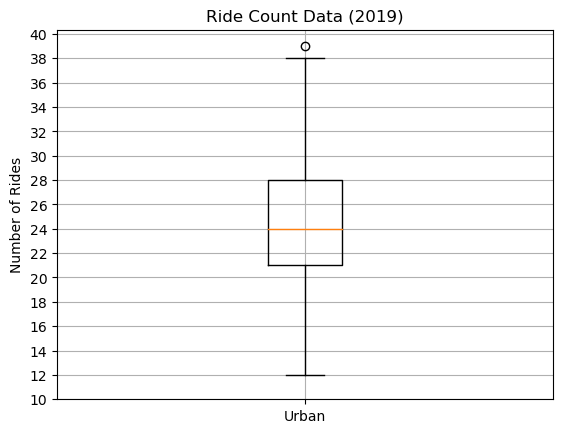

In [43]:
# Create a box-and-whisker plot for the urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)

# Add the title, y-axis labels, and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step = 2.0))
ax.grid()
plt.show()

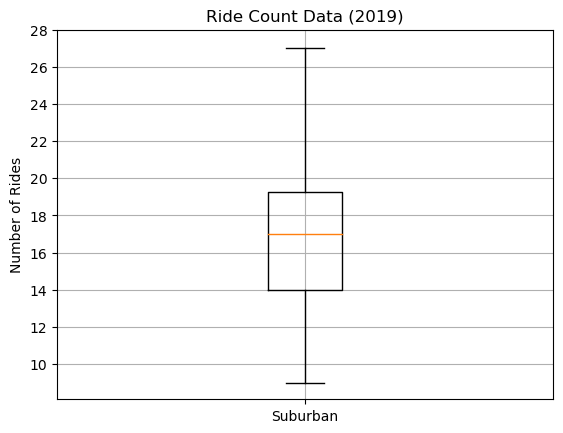

In [44]:
# Skill Drill 5.4.4
# Generating box-and-whisker plot for suburban data
x_labels_suburban = ["Suburban"]

fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels = x_labels_suburban)
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 30, step = 2.0))
ax.grid()
plt.show()

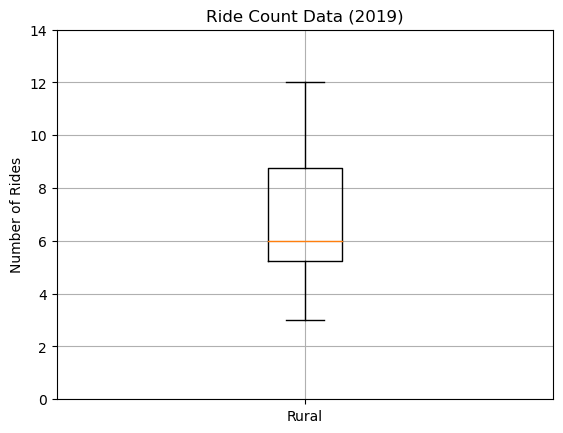

In [45]:
# Skill Drill 5.4.4
# Generating box-and-whisker plot for rural data
x_labels_rural = ["Rural"]

fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels = x_labels_rural)
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")

ax.set_yticks(np.arange(0, 16, step = 2.0))
ax.grid()
plt.show()

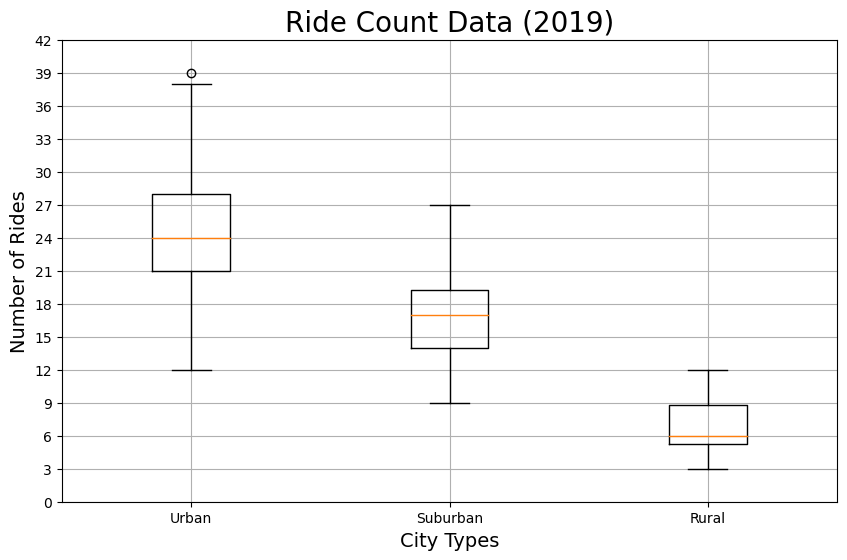

In [46]:
# Add all ride count box-and_whisker plots to the same graph
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_title("Ride Count Data (2019)", fontsize = 20)
ax.set_ylabel("Number of Rides", fontsize = 14)
ax.set_xlabel("City Types", fontsize = 14)
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_yticks(np.arange(0, 45, step = 3.0))
ax.grid()

# Saving the figure
plt.savefig("analysis/Fig2.png")
plt.show()

In [47]:
# Finding the outlier city that had 39 rides
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f'{urban_city_outlier} has the highest rider count.')

West Angela has the highest rider count.


In [48]:
# Stopped at box-and-whisker plots for ride fare data

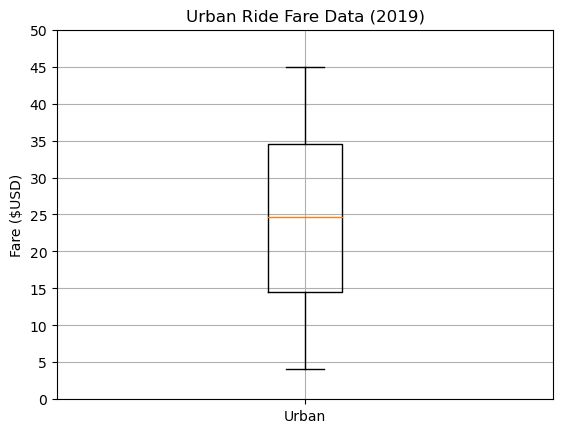

Summary Statistics:


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [57]:
# Creating a box-and-whisker plot for the urban fare data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels = x_labels)

# Adding the title, y_axis label, and grid
ax.set_title("Urban Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 51, step = 5.0))
ax.grid()
plt.show()
print("Summary Statistics:")
urban_fares.describe()

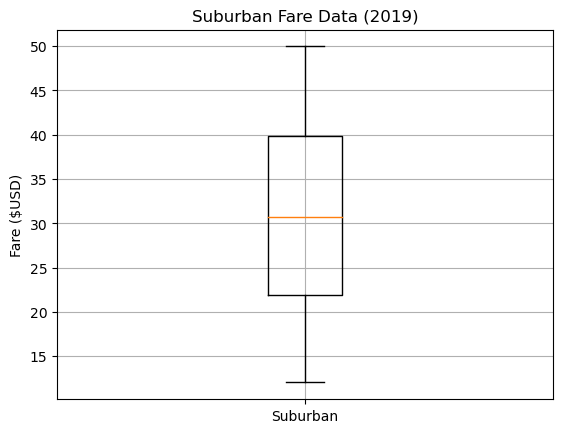

Summary Statistics:


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [59]:
# Skill Drill 5.4.4
# Creating a box-and-whisker plot for the suburban fare data
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels = x_labels)
ax.set_title("Suburban Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.grid()
plt.show()

# Printing summary statistics
print("Summary Statistics:")
suburban_fares.describe()

Summary Statistics:


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

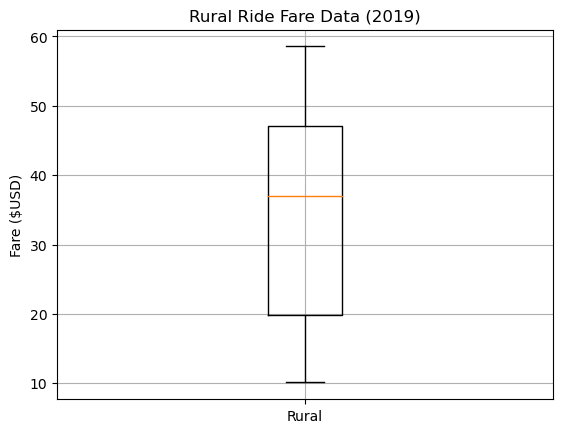

In [60]:
# Skill Drill 5.4.4
# Creating a box-and-whisker plot for the rural fare data
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels = x_labels)
ax.set_title("Rural Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.grid()

# Printing summary statistics
print("Summary Statistics:")
rural_fares.describe()

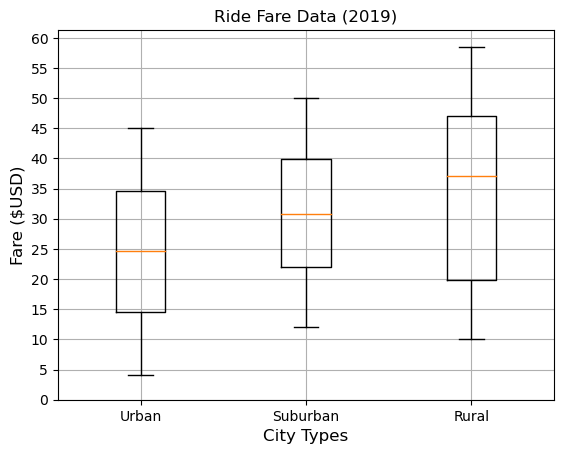

In [74]:
# Skill Drill 5.4.4
# Creating box-and-whisker plot of all the ride fare data from every type of city
x_labels = ["Urban", "Suburban", "Rural"]
fig, ax = plt.subplots()
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
ax.boxplot(ride_fare_data, labels = x_labels)

# Adding the title, y_axis label, and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)", fontsize = 12)
ax.set_xlabel("City Types", fontsize = 12)
ax.set_yticks(np.arange(0, 61, step = 5.0))
ax.grid()

# Saving the figure
plt.savefig("analysis/Fig3.png")
plt.show()

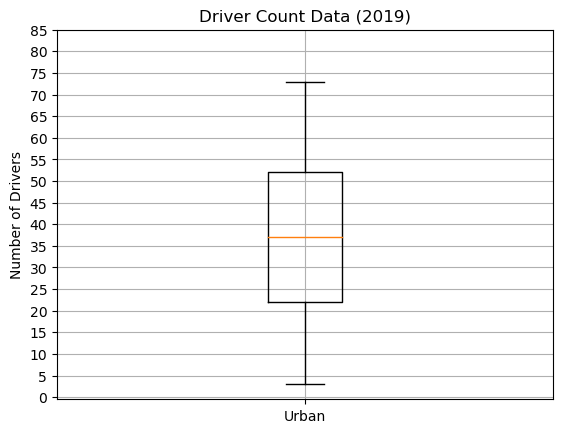

Summary Statistics:


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [73]:
# Creating another box-and-whisker plot for the urban driver count data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels = x_labels)

# Add the title, y-axis label, and grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step = 5.0))
ax.grid()
plt.show()
print("Summary Statistics:")
urban_drivers.describe()

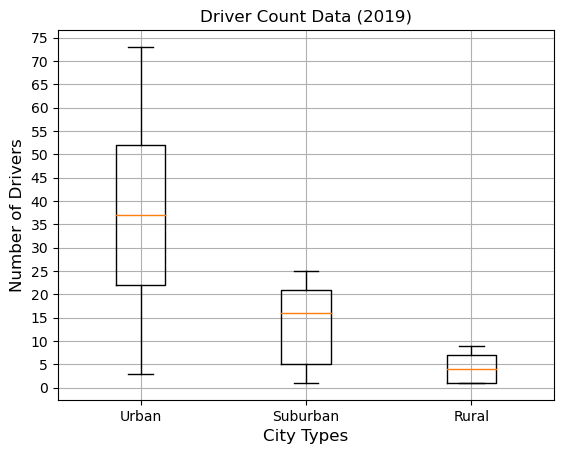

In [78]:
# Skill Drill 5.4.4
# Creating a box-and-whisker plot for all the city types' driver count data
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(driver_count_data, labels = x_labels)
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers", fontsize = 12)
ax.set_xlabel("City Types", fontsize = 12)
ax.set_yticks(np.arange(0, 80, step = 5.0))
ax.grid()

# Saving the figure
plt.savefig("analysis/Fig4.png")
plt.show()